In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
bas=pd.read_csv('leads_basic_details.csv')
dem=pd.read_csv('leads_demo_watched_details.csv')
inte=pd.read_csv('leads_interaction_details.csv')
reas=pd.read_csv('leads_reasons_for_no_interest.csv')
man=pd.read_csv('sales_managers_assigned_leads_details.csv')

## Data Preproceshing

# Tables Information

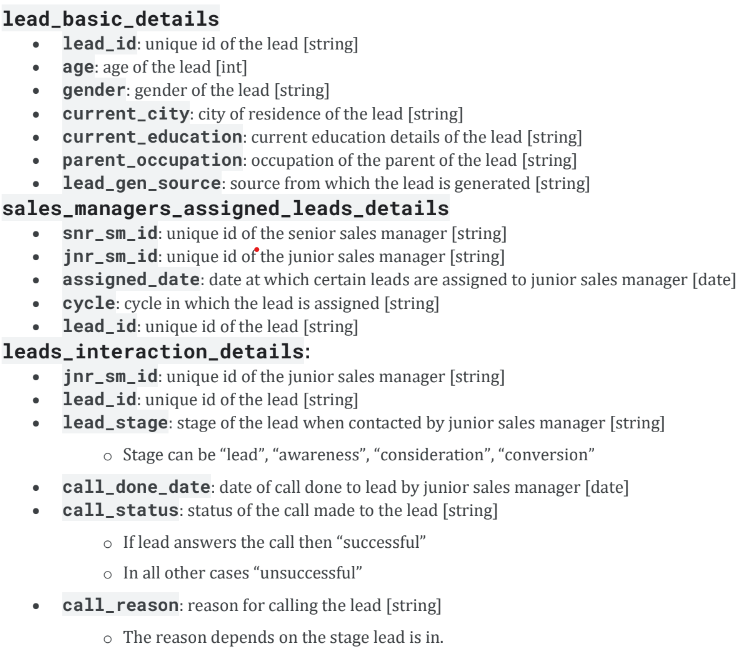

## Check For Null Values

In [4]:
bas.isna().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

In [5]:
dem.isna().sum()

lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64

In [6]:
inte.isna().sum()

jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64

In [7]:
reas.isna().sum()

lead_id                                     0
reasons_for_not_interested_in_demo        130
reasons_for_not_interested_to_consider    215
reasons_for_not_interested_to_convert     243
dtype: int64

In [8]:
(reas.isna().mean())*100

lead_id                                    0.000000
reasons_for_not_interested_in_demo        44.217687
reasons_for_not_interested_to_consider    73.129252
reasons_for_not_interested_to_convert     82.653061
dtype: float64

### filling Null Values with Mode 

In [9]:
reas['reasons_for_not_interested_in_demo'].fillna(reas['reasons_for_not_interested_in_demo'].mode,inplace=True)

In [10]:
reas['reasons_for_not_interested_to_consider'].fillna(reas['reasons_for_not_interested_to_consider'].mode,inplace=True)

In [11]:
reas['reasons_for_not_interested_to_convert'].fillna(reas['reasons_for_not_interested_to_convert'].mode,inplace=True)

In [12]:
man.isna().sum()

snr_sm_id        0
jnr_sm_id        0
assigned_date    0
cycle            0
lead_id          0
dtype: int64

## Check For Outliers

In [13]:
num1=[]
for i in bas.columns:
    if bas[i].dtypes!=object:
        num1.append(i)

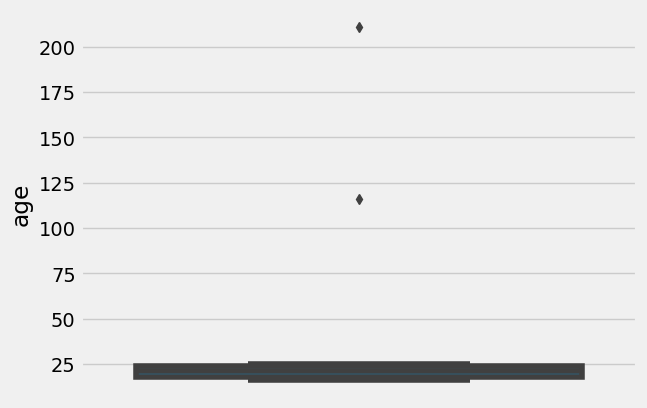

In [14]:
for e in num1:
     plt.figure()
     sns.boxplot(y=e, data=bas)

### Removing Outliers

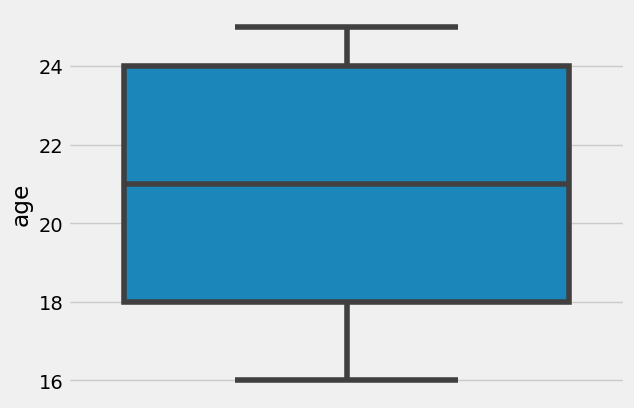

In [15]:
for e in num1:
  percentile25=bas[e].quantile(0.25)
  percentile75=bas[e].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  bas=bas[bas[e]<=upper_limit]
  bas=bas[bas[e]>=lower_limit]
  plt.figure()
  sns.boxplot(y=e, data=bas)

In [16]:
num2=[]
for i in dem.columns:
    if dem[i].dtypes!=object:
        num2.append(i)

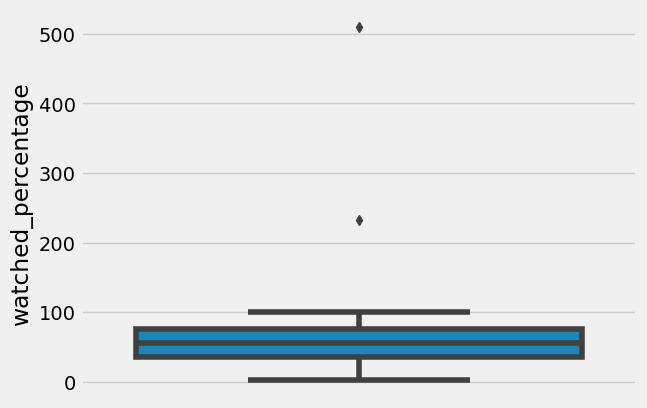

In [17]:
for e in num2:
     plt.figure()
     sns.boxplot(y=e, data=dem)

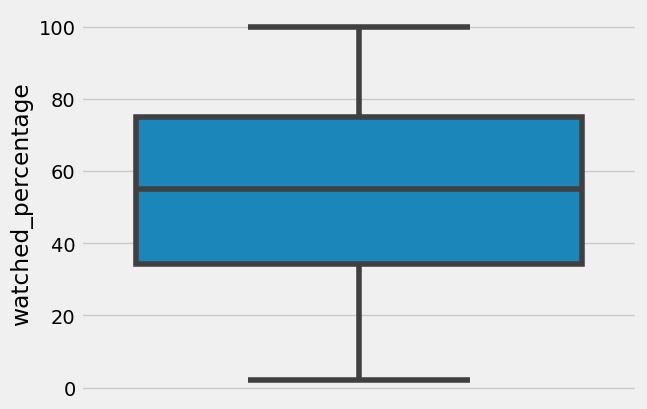

In [18]:
for e in num2:
  percentile25=dem[e].quantile(0.25)
  percentile75=dem[e].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  dem=dem[dem[e]<=upper_limit]
  dem=dem[dem[e]>=lower_limit]
  plt.figure()
  sns.boxplot(y=e, data=dem)

In [19]:
num3=[]
for i in inte.columns:
    if inte[i].dtypes!=object:
        num3.append(i)

In [20]:
for e in num3:
     plt.figure()
     sns.boxplot(y=e, data=inte)

In [21]:
num4=[]
for i in reas.columns:
    if reas[i].dtypes!=object:
        num4.append(i)

In [22]:
for e in num4:
     plt.figure()
     sns.boxplot(y=e, data=reas)

In [23]:
num5=[]
for i in man.columns:
    if man[i].dtypes!=object:
        num5.append(i)

In [24]:
for e in num3:
     plt.figure()
     sns.boxplot(y=e, data=man)

## It is Clear from this Insight that there scope  of improvement in website 

In [25]:
sour=bas.groupby('lead_gen_source').aggregate({'lead_id':'count'}).sort_values(by='lead_id',ascending=False).reset_index()

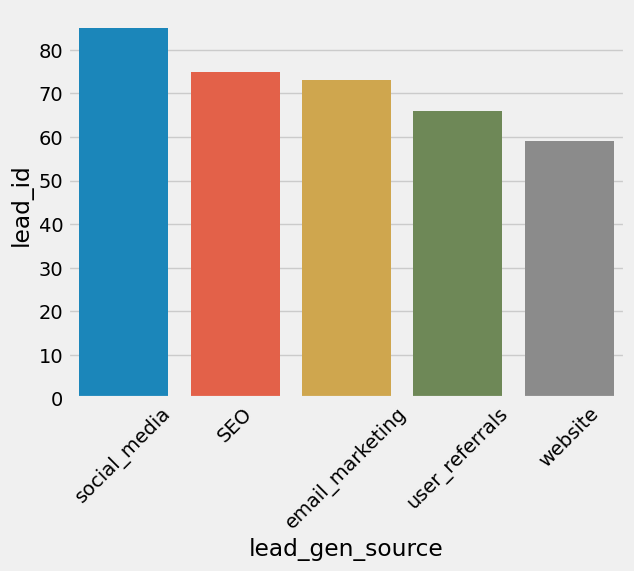

In [26]:
sns.barplot(data=sour,x='lead_gen_source',y='lead_id')
plt.xticks(rotation=45)
plt.show()

In [27]:
bas

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


In [28]:
dem 

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54
...,...,...,...,...
189,USR1317,2/25/2022,English,48
190,USR1318,2/25/2022,English,83
191,USR1319,2/28/2022,English,84
192,USR1343,1/25/2022,English,68


In [29]:
watch_percentage=bas.merge(dem,on='lead_id')

## Mean Watching Percentage of According to Language

In [30]:
 watch_percentage.groupby(['language']).aggregate({'watched_percentage':'mean'})

,watched_percentage
language,
English,55.972973
Hindi,48.894737
Telugu,50.196721


In [31]:
watch=watch_percentage.groupby(['language']).aggregate({'watched_percentage':'mean'}).reset_index()

<AxesSubplot:xlabel='language', ylabel='watched_percentage'>

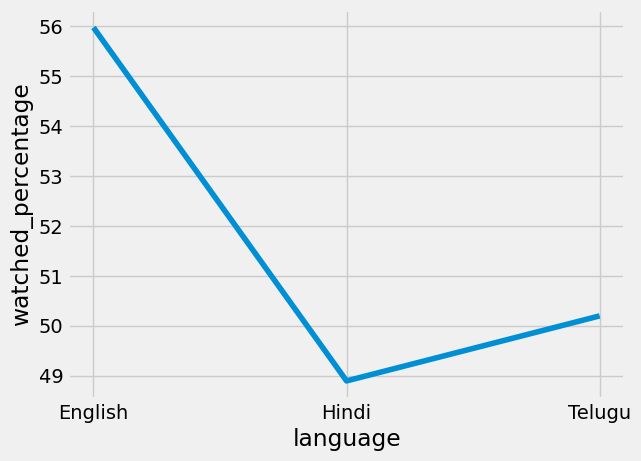

In [32]:
sns.lineplot(data=watch,x='language',y='watched_percentage')

#### It is understable demo videos audio Quality  in Hindi Language  is not that much good so we have to enhance the quality of demo video in  hindi language

In [33]:
man

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005
...,...,...,...,...,...
355,SNR501MG,JNR1001MG,2/19/2022,4,USR1356
356,SNR501MG,JNR1001MG,1/1/2022,1,USR1357
357,SNR501MG,JNR1001MG,1/8/2022,2,USR1358
358,SNR501MG,JNR1001MG,1/15/2022,3,USR1359


In [34]:
inte

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup
...,...,...,...,...,...,...
2187,JNR1001MG,USR1356,lead,2/21/2022,unsuccessful,lead_introduction
2188,JNR1001MG,USR1357,lead,1/8/2022,unsuccessful,lead_introduction
2189,JNR1001MG,USR1358,lead,1/12/2022,unsuccessful,lead_introduction
2190,JNR1001MG,USR1359,lead,1/22/2022,unsuccessful,lead_introduction


In [44]:
inte['lead_stage'].unique()

array(['lead', 'awareness', 'consideration', 'conversion'], dtype=object)

## Conversion Rate City Wise

In [35]:
conv=bas.merge(inte,on='lead_id')

In [36]:
a=conv[(conv['lead_stage']=="conversion") | (conv['lead_stage']=="awareness")].count()[0]

In [37]:
conv2=conv[(conv['lead_stage']=="conversion")].groupby('current_city').aggregate({'lead_id':'count'})/a*100

In [38]:
conv2.reset_index()

,current_city,lead_id
0,Bengaluru,4.792332
1,Chennai,2.236422
2,Hyderabad,4.153355
3,Kochi,2.875399
4,Mumbai,1.597444
5,Visakhapatnam,4.792332


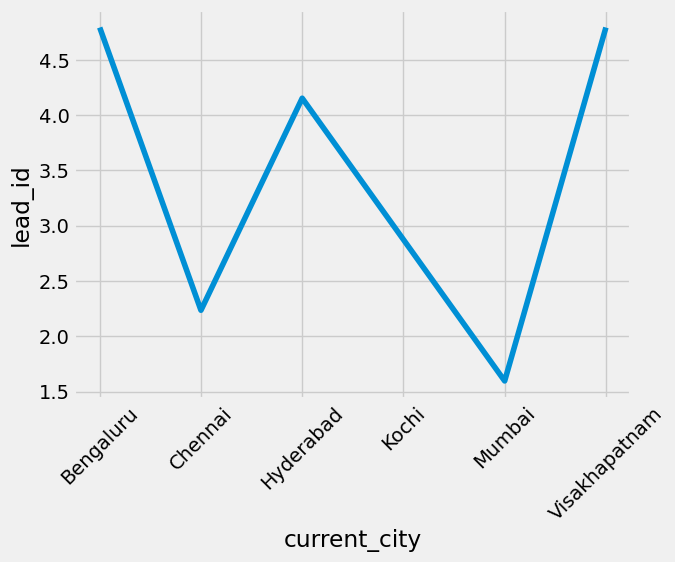

In [39]:
sns.lineplot(data=conv2,x='current_city',y='lead_id')
plt.xticks(rotation=45)
plt.show()

In [40]:
bas.to_csv('bas.csv')

In [41]:
dem.to_csv('dem.csv')


In [42]:
inte.to_csv('inte.csv')


In [43]:
man.to_csv('man.csv')
